# Imports and path definition

In [98]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
data_folder_1 = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

# Amber_laptop
#data_folder_1 = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
#data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
#data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

In [99]:
# Path to where the data is on your machine.
data_path_1 = data_folder_1.joinpath('20230211')

# ribolla files
data_path_2 = data_folder_2.joinpath('20230315')
data_path_3 = data_folder_2.joinpath('20230324')
data_path_4 = data_folder_2.joinpath('20230331')
data_path_5 = data_folder_2.joinpath('20230404')
data_path_6 = data_folder_2.joinpath('20230405')

# fiano files
data_path_7 = data_folder_3.joinpath('20230309')
data_path_8 = data_folder_3.joinpath('20230317')
data_path_9 = data_folder_3.joinpath('20230323')
data_path_10 = data_folder_3.joinpath('20230328')
data_path_11 = data_folder_3.joinpath('20230331')

# Create a list to store all the data paths
all_data_paths = [
    data_path_1,
    data_path_2,
    data_path_3,
    data_path_4,
    data_path_5,
    data_path_6,
    data_path_7,
    data_path_8,
    data_path_9,
    data_path_10,
    data_path_11
]

In [100]:
import sys
sys.path.append('../src') # Add src folder to path.
import file_management as fm # Import my file_management functions from /src.

selected_data_session = all_data_paths[1] # select one of the sessions! 1-11
fm.get_files_in_data_path(selected_data_session)

['Z:\\davide\\2p_data\\441394_ribolla\\20230315\\behaviour_data.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\cnmf.hdf5',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\decoded_log.mat',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\metrics.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\neural_data.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\parameters.yml',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\tif_header.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\trial_data.csv']

In [101]:
import os

# List all the files in the selected data session
files = os.listdir(selected_data_session)
print(files)

['behaviour_data.pickle', 'cnmf.hdf5', 'decoded_log.mat', 'metrics.pickle', 'neural_data.pickle', 'parameters.yml', 'tif_header.pickle', 'trial_data.csv']


*Trial Matrix*

In [102]:
# Update the trial_data_file and read the CSV file (accessing a specific file within the selected data session)
trial_data_file = selected_data_session.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
trial_data

,env_onset,tunnel1_onset,reward_zone_onset,tunnel2_onset,tunnel2_offset,trial_duration,env_label,sound_onset,sound_offset,sound_presented,reward_onset,reward_offset
0,0.0,42156,44218,60055,63356,NaN,1,NaN,NaN,False,49365,52379
1,63356.0,74880,79224,99888,102859,NaN,3,67711.0,70724.0,True,82844,85854
2,102859.0,128087,130916,146712,150998,NaN,2,105920.0,108931.0,True,133734,136756
3,150998.0,165816,168377,202071,205056,NaN,1,NaN,NaN,False,170274,173281
4,205056.0,218075,220576,250030,252168,NaN,2,NaN,NaN,False,222338,225349
5,252168.0,277388,291770,315636,318091,NaN,3,NaN,NaN,False,303934,306949
6,318091.0,337322,340364,357053,359898,NaN,3,NaN,NaN,False,341169,344168
7,359898.0,383703,386747,409504,412930,NaN,1,NaN,NaN,False,388690,391701
8,412930.0,430375,450378,510654,512845,NaN,2,417199.0,420207.0,True,452787,455796
9,512845.0,691339,694429,719115,721463,NaN,2,NaN,NaN,False,695632,698636


*Behavioural Data*

In [103]:
# Load behavioural data.
bdata_file = selected_data_session.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

*Normpos and sliced time computation*

In [104]:
import ratemaps as rm

# Can just use trial_data instead of a subset to run over the entire trial.
# Subset the data for env_label = 1, 2 or 3!
subset = trial_data[trial_data['env_label'] == 1]

# Define the onset and offset column names to cut the data from the trial matrix!
# it is also of interest to see reward_zone_onset and 
onset_col = 'env_onset'
offset_col = 'tunnel1_onset'

# Call the process_subset function with the correct arguments.
norm_pos, sliced_time = rm.normpos_slicedtime(subset, b_data, onset_col, offset_col)

# Use the normalized positions and sliced times as needed.
print(norm_pos)
print(sliced_time)

0: 4294967295
1: 1494
2: 1503
3: 1502
4: 1493
5: 1500
6: 1494
7: 1496
8: 1498
9: 1504
10: 1501
11: 1501
12: 1502
13: 1497
[4.65661287e-10 4.65661287e-10 4.65661287e-10 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[ -27.16141354  -27.16041354  -27.15941354 ... 2029.91858646 2029.91958646
 2029.92058646]


In [105]:
time = b_data['time']
time

array([ -27.16141354,  -27.16041354,  -27.15941354, ..., 2140.65958646,
       2140.66058646, 2140.66158646])

*Neural Data*

In [106]:
# Neural data
ndata_file = selected_data_session.joinpath('neural_data.pickle')
with open(ndata_file,'rb') as file:
    n_data = pickle.load(file)

In [107]:
for k in n_data.keys():
    if type(n_data[k])==np.ndarray:
        print(f'{k}-> array with shape: {n_data[k].shape}')
    else:
        print(f'{k}-> list with len {len(n_data[k])}')

traces-> array with shape: (191, 63904)
footprints-> array with shape: (492, 492, 191)
df_f-> array with shape: (191, 63904)
deconvolved-> list with len 191
positions-> array with shape: (191, 2)
contour-> list with len 191


*Spike positions*

In [108]:
spike_positions = rm.get_spike_positions(n_data, norm_pos, b_data)

*Firing rate maps*

In [109]:
firing_rate_maps, occupancy = rm.compute_firing_rate_maps(spike_positions, norm_pos)
# Gives the occupancy
# Also gives spikes_hist for plotting
#plt.plot(spikes_hist[0])

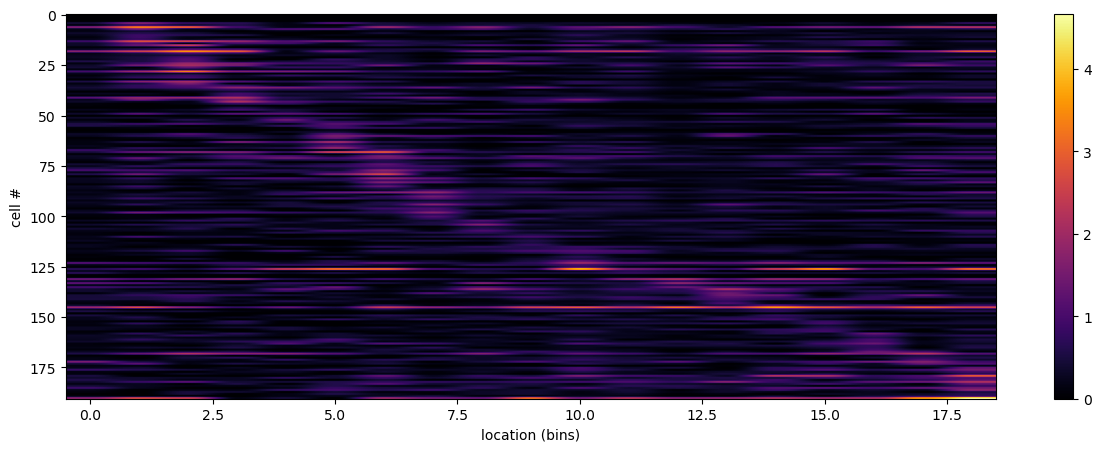

In [110]:
plt.figure(figsize=(15,5))
peak_locations = firing_rate_maps.argmax(axis=1)
ix = np.argsort(peak_locations)
plt.imshow(firing_rate_maps[ix,:], cmap='inferno', aspect = 'auto')
plt.xlabel('location (bins)')
plt.ylabel('cell #')
plt.colorbar()

*Spatial information and histogram of spatial info*

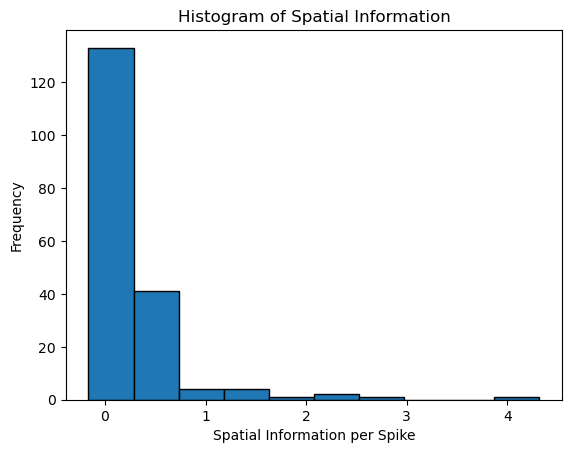

In [111]:
spatial_info = rm.calculate_spatial_info(firing_rate_maps, occupancy)

# Compute histogram values
hist, bins = np.histogram(spatial_info, bins=10)

# Plot the histogram
plt.bar(bins[:-1], hist, width=np.diff(bins), edgecolor='black')
plt.xlabel('Spatial Information per Spike')
plt.ylabel('Frequency')
plt.title('Histogram of Spatial Information')
plt.show()